## Load Basic Libraries

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  # Corrected import statement
import seaborn as sns


## Import Machine Learning Librabries

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score

## Read the CSV file

In [4]:
data = pd.read_csv('auto-mpg.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [5]:
data.shape

(398, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    396 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model-year    398 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 21.9 KB


In [11]:
# Mpg is Predicted
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model-year      0
dtype: int64

In [10]:
data= data.dropna(subset=['horsepower'])

In [12]:
#data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())

<ipython-input-12-9ad3636faa75>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['horsepower']=data['horsepower'].fillna(data['horsepower'].median())


In [14]:
data['horsepower']=data['horsepower'].astype('float64')
data

<ipython-input-14-9b2543bd81ea>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['horsepower']=data['horsepower'].astype('float64')


,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


In [16]:
plt.figure(figsize=(20,15))

<Figure size 2000x1500 with 0 Axes>

<Figure size 2000x1500 with 0 Axes>

<Axes: >

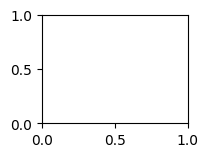

In [18]:
plt.subplot(3,3,1)

<ipython-input-19-cc96842535be>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['cylinders'],color='purple')


<Axes: xlabel='cylinders', ylabel='Density'>

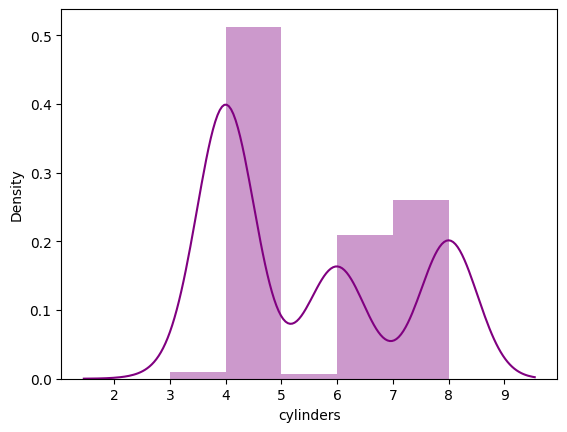

In [19]:
sns.distplot(data['cylinders'],color='purple')

<ipython-input-22-7e4484484737>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['displacement'],color='green')


<Axes: xlabel='displacement', ylabel='Density'>

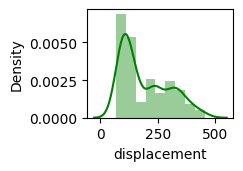

In [22]:
plt.subplot(3,3,2)
sns.distplot(data['displacement'],color='green')

<ipython-input-23-fd0eba5d208c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['horsepower'],color='blue')


<Axes: xlabel='horsepower', ylabel='Density'>

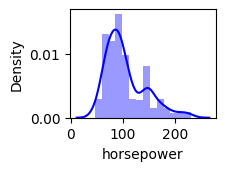

In [23]:
plt.subplot(3,3,3)
sns.distplot(data['horsepower'],color='blue')

<ipython-input-25-96af08748c75>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['weight'],color='red')


<Axes: xlabel='weight', ylabel='Density'>

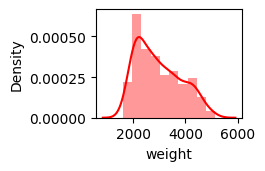

In [25]:
plt.subplot(3,3,4)
sns.distplot(data['weight'],color='red')

<ipython-input-26-ea718baa77a3>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['acceleration'],color='pink')


<Axes: xlabel='acceleration', ylabel='Density'>

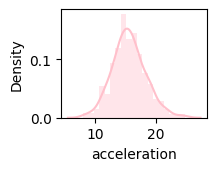

In [26]:
plt.subplot(3,3,5)
sns.distplot(data['acceleration'],color='pink')

<ipython-input-28-7da0f9b75fc8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['model-year'],color='orange')


<Axes: xlabel='model-year', ylabel='Density'>

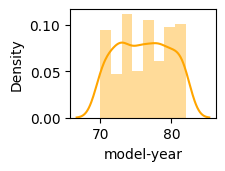

In [28]:
plt.subplot(3,3,3)
sns.distplot(data['model-year'],color='orange')

In [30]:
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model-year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82
394,44.0,4,97.0,52.0,2130,24.6,82
395,32.0,4,135.0,84.0,2295,11.6,82
396,28.0,4,120.0,79.0,2625,18.6,82


## Separating dependent and independent variable

In [39]:
X = data.drop('mpg',axis=1)
y =data[['mpg']]
y

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0
...,...
393,27.0
394,44.0
395,32.0
396,28.0


In [41]:
from sklearn import preprocessing
X_scaled = preprocessing.scale(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)
y_scaled = preprocessing.scale(y)
X_scaled = pd.DataFrame(y_scaled , columns=y.columns)

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, X_scaled, test_size=0.3, random_state=1)

In [46]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)


X_train (277, 6)
X_test (119, 6)
y_train (277, 6)
y_test (119, 6)


In [48]:
from sklearn.linear_model import LinearRegression
regresstion_model=LinearRegression()
regresstion_model.fit(X_train,y_train)

LinearRegression()

In [49]:
for idx, col_name in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col_name, regresstion_model.coef_[0][idx]))

The coefficient for cylinders is 1.000000000000002
The coefficient for displacement is -2.124616515504578e-16
The coefficient for horsepower is -1.2343427833052216e-15
The coefficient for weight is -8.883066526302447e-16
The coefficient for acceleration is -1.8997462602389419e-16
The coefficient for model-year is 4.8181432474193835e-17


In [50]:
intercept = regresstion_model.intercept_[0]

In [52]:
print("The intercept for our model is ",intercept)

The intercept for our model is  4.163336342344337e-17


## Ridge Regresstion

In [54]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col_name, ridge.coef_[0][idx]))

The coefficient for cylinders is 0.9874986406582384
The coefficient for displacement is 0.012272236469369091
The coefficient for horsepower is -0.0010876111287621215
The coefficient for weight is 0.0006264676361876693
The coefficient for acceleration is -0.00017728902552421565
The coefficient for model-year is -0.00019240413297519303


## Laso Regresstion

In [55]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.3)
lasso.fit(X_train,y_train)
for idx, col_name in enumerate(X_train.columns):
  print("The coefficient for {} is {}".format(col_name, lasso.coef_[0][idx]))


The coefficient for cylinders is 0.698201682058489
The coefficient for displacement is 0.0
The coefficient for horsepower is 0.0
The coefficient for weight is 0.0
The coefficient for acceleration is -0.0
The coefficient for model-year is -0.0


In [56]:
print(regresstion_model.score(X_train,y_train))
print(regresstion_model.score(X_test,y_test))
print(ridge.score(X_train,y_train))
print(ridge.score(X_test,y_test))
print(lasso.score(X_train,y_train))
print(lasso.score(X_test,y_test))

1.0
1.0
0.9999882800441506
0.9999828262901755
0.9066444678361475
0.9043185266391855
